In [7]:
import warnings
warnings.filterwarnings(action='ignore')
# warnings.filterwarnings(action='default')
# 수업 시작전 설정
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format='retina'

In [8]:
from LAC import LAC

In [10]:

from selenium import webdriver
driver = webdriver.Chrome('E:\금경용\selenium\chromedriver.exe')
link_list=[]
for i in range(0,10,10):#기사 1000개   
    driver.get('https://www.baidu.com/s?ie=utf-8&medium=2&rtt=1&bsst=1&rsv_dl=news_b_pn&cl=2&wd=%E9%9F%A9%E5%9B%BD&tn=news&rsv_bp=1&tfflag=0&x_bfe_rqs=03E80&x_bfe_tjscore=0.100000&tngroupname=organic_news&newVideo=12&pn='+str(i))
    result_list=driver.find_elements_by_css_selector('div h3 > a')
    for result in result_list:
        link_list.append(result.get_attribute('href'))

<>:2: DeprecationWarning: invalid escape sequence \s
<>:2: DeprecationWarning: invalid escape sequence \s
<ipython-input-10-3961f61d9ee9>:2: DeprecationWarning: invalid escape sequence \s
  driver = webdriver.Chrome('E:\금경용\selenium\chromedriver.exe')


In [11]:
# 형태소 분석 다운받기 ! 중국어 형태소 ! 
import requests 
from bs4 import BeautifulSoup
news=[]
for link in link_list:
    news_response = requests.get(link)
    news_soup=BeautifulSoup(news_response.content, "html.parser")
    news_title = news_soup.select_one('h2.index-module_articleTitle_28fPT')
    news_content = news_soup.select('div p > span.bjh-p')
    news_context_text=[]
    for i in range(len(news_content)):
        news_context_text.append(news_content[i].text)
    news_context_join=''.join(news_context_text)
    content=news_title.text+''+news_context_join
    news.append(content)

In [12]:
中文百度新闻="".join(news)

In [13]:
lac=LAC(mode='rank')
seg_reseult=lac.run(中文百度新闻)

In [14]:
xingfu=[]
for i in range(len(seg_reseult[0])):
    if seg_reseult[1][i]=='s':
        xingfu.append(seg_reseult[0][i])
    elif seg_reseult[1][i]=='LOC': 
        xingfu.append(seg_reseult[0][i])
    elif seg_reseult[1][i]=='a':
        xingfu.append(seg_reseult[0][i])
    elif seg_reseult[1][i]=='nz':
        xingfu.append(seg_reseult[0][i])
    elif seg_reseult[1][i]=='PER':
        xingfu.append(seg_reseult[0][i])
    elif seg_reseult[1][i]=='ORG':
        xingfu.append(seg_reseult[0][i])
    elif seg_reseult[1][i]=='an':
        xingfu.append(seg_reseult[0][i])
    elif seg_reseult[1][i]=='vn':
        xingfu.append(seg_reseult[0][i])
    elif seg_reseult[1][i]=='n':
        xingfu.append(seg_reseult[0][i])
        

In [15]:
image=' '.join(xingfu)

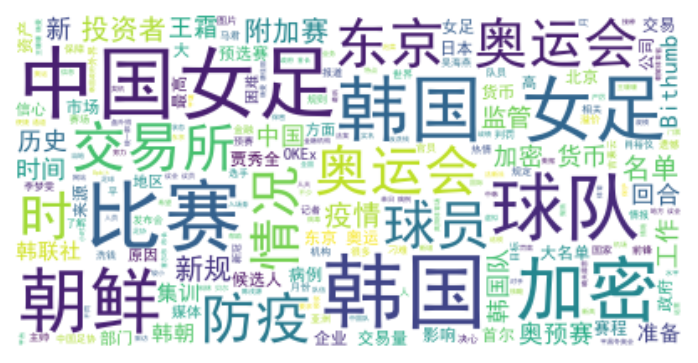

In [16]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
%matplotlib inline
wordc=WordCloud(background_color='white',
               max_words=2000,
               font_path="c:/Windows/Fonts/simhei.ttf", 
               relative_scaling=0.1)
wordc.generate(image)
plt.figure()
plt.imshow(wordc,interpolation='bilinear')
plt.axis('off')
plt.show()

In [17]:
list_image=image.split()

In [18]:
import collections
counts=collections.Counter(list_image)
print(counts)

Counter({'韩国': 95, '中国女足': 43, '比赛': 35, '奥运会': 27, '女足': 22, '加密': 22, '东京': 22, '球队': 21, '朝鲜': 14, '交易所': 13, '货币': 13, '防疫': 13, '时': 10, '球员': 10, '情况': 9, '附加赛': 9, '投资者': 9, '疫情': 9, '名单': 8, '新规': 8, '政府': 8, '奥运': 8, '病例': 8, '中国': 7, '王霜': 7, '时间': 7, '监管': 7, '工作': 7, '奥预赛': 6, '回合': 6, '韩国队': 6, '新': 6, '历史': 6, '韩联社': 6, '韩朝': 6, '准备': 6, '集训': 6, '王珊珊': 5, '来源': 5, '影响': 5, '大': 5, 'Bithumb': 5, '交易量': 5, '首尔': 5, '日本': 5, '大名单': 5, '贾秀全': 5, '地方': 5, '候选人': 5, '北京': 4, '预选赛': 4, '赛程': 4, '市场': 4, '资产': 4, '企业': 4, '交易': 4, '部门': 4, '最高': 4, '公司': 4, 'OKEx': 4, '原因': 4, '高': 4, '媒体': 4, '困难': 4, '信心': 4, '方面': 4, '地区': 4, '中国足协': 4, '队员': 4, '报道': 4, '目标': 4, '遗憾': 4, '新冠': 4, '记者': 4, '国家': 4, '相关': 4, '主帅': 4, '发布会': 4, '外界': 4, '判罚': 4, '市长': 4, '杨曼': 3, '唐佳丽': 3, '图片': 3, '李梦雯': 3, '吴海燕': 3, '马君': 3, '前锋': 3, '肖裕仪': 3, '金融': 3, '情报': 3, '规定': 3, '决心': 3, '洗钱': 3, '了解': 3, '机构': 3, '热情': 3, '溢价': 3, '月份': 3, '人': 3, '规则': 3, '月': 3, '保障': 3, '赛场': 3, '刁难': 3, '官员': 3, 

In [19]:
china_danci=image

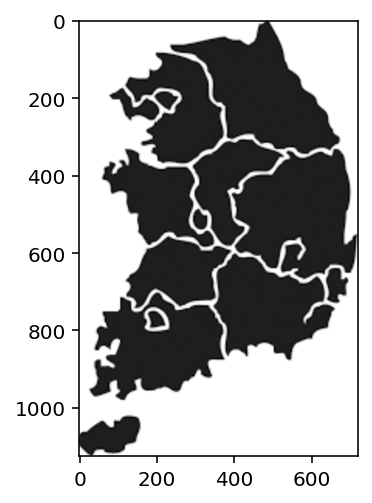

In [20]:
from PIL import Image
import numpy as np
img = Image.open('south_korea.png').convert('RGBA')
# png파일 : 'RGBA'로   jpg파일: 'RGB'
mask = Image.new('RGB', img.size, (0,0,0))
mask.paste(img)
plt.imshow(mask)
mask = np.array(mask)

(-0.5, 719.5, 1123.5, -0.5)

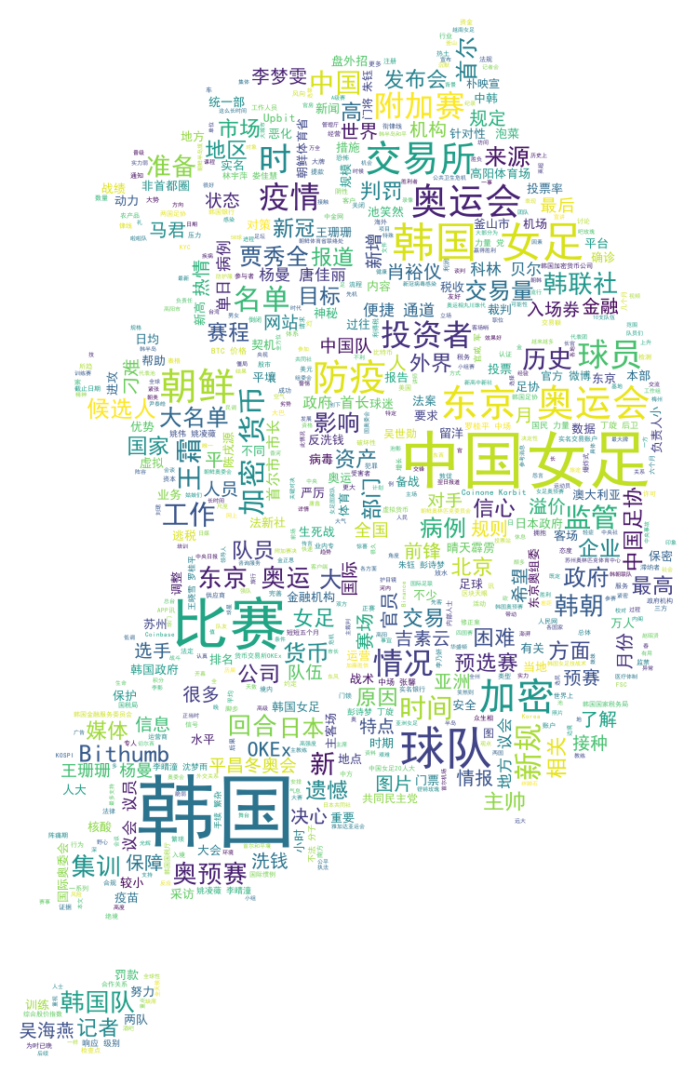

In [21]:
wordcloud = WordCloud(background_color='white',
                     max_words=2000,
                     font_path="c:/Windows/Fonts/simhei.ttf",
                     relative_scaling=0.5,
                     mask=mask)
wordcloud.generate(china_danci)
plt.figure(figsize=(6,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')